In [55]:
from google.colab import drive
drive.mount('/content/drive')
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from plotnine import *
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> **1. Introduction**

Data Set about Movies Metadata and External data of Movie performace wolrd wide

**1.1 Description of dataset attributes**

Please find the details for the datset attributes:-

1. Color :- Movie is black or coloured
2. Director_name:- Name of the movie director
3. num_critic_for_reviews :- No of critics for the movie
4. duration:- movie duration in minutes
5. director_facebook_likes:-Number of likes for the Director on his Facebook Page
6. actor_3_facebook_likes:- No of likes for the actor 3 on his/her facebook Page
7. actor2_name:- name of the actor 2
8. actor_1_facebook_likes:- No of likes for the actor 1 on his/her facebook Page
9. gross:- Gross earnings of the movie in Dollars
10. genres:- Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
11. actor_1_name:- Name of the actor 1
12. movie_title:-Title of the movie
13. num_voted_users:-No of people who voted for the movie
14. cast_total_facebook_likes:- Total facebook like for the movie
15. actor_3_name:- Name of the actor 3
16. facenumber_in_poster:- No of actors who featured in the movie poster
17. plot_keywords:-Keywords describing the movie plots
18. movie_imdb_link:-Link of the movie link
19. num_user_for_reviews:- Number of users who gave a review
20. language:- Language of the movie
21. country:- Country where movie is produced
22. content_rating:- Content rating of the movie
23. budget:- Budget of the movie in Dollars
24. title_year:- The year in which the movie is released
25. actor_2_facebook_likes:- facebook likes for the actor 2
26. imdb_score:- IMDB score of the movie
27. aspect_ratio :- Aspect ratio the movie was made in
28. movie_facebook_likes:- Total no of facebook likes for the movie
    

**1.2 Case Study**


The dataset here gives the massive information about the movies and their IMDB scores respectively. We are going to analyze each and every factors which can influence the imdb ratings so that we can predict better results.The movie with the higher imdb score is more successful as compared to the movies with low imdb score.

**2. Data Preprocessing**

In [56]:
#Reading the Data

movie_df=pd.read_csv("/content/drive/MyDrive/colab/movie_metadata.csv")
movie_df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [57]:
# Adding External Data containing Total gross worldwide

f = open('/content/drive/MyDrive/colab/movie_budget.json')
data = json.load(f)

def getworldwidegross(name):

  if list(filter(lambda x: x['movie_name'] == name.strip(), data)):
    return int(list(filter(lambda x: x['movie_name'] == name.strip(), data))[0]['worldwide_gross'].replace('$', '').replace(',', ''))

  return 0

def get_release_month(name):

  if list(filter(lambda x: x['movie_name'] == name.strip(), data)):
    return int(list(filter(lambda x: x['movie_name'] == name.strip(), data))[0]['release_date'].split('/')[0])

  return 0

movie_df['WorldWide_gross']=[getworldwidegross(x) for x in movie_df['movie_title']]
movie_df['release_month']=[get_release_month(x) for x in movie_df['movie_title']]

In [58]:
#Displaying the data type of the dataset attributes
print('Size:',movie_df.shape)
movie_df.dtypes

Size: (5043, 30)


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

**Data Set column Datatypes**
<Br>


 We have 12 Categorical (Object) and 26 Numerical columns (Int64 & Float64)




In [59]:
#Dropping the Imdb link from the dataset
movie_df.drop_duplicates('movie_title', keep = 'last', inplace=True) # Name of the movie duplicate
movie_df.drop_duplicates(inplace=True) # Full row duplicate remove
movie_df.drop('movie_imdb_link', axis=1, inplace=True) # Link of moive not required

#Removing the color section as most of the movies are colored
movie_df["color"].value_counts()
movie_df.drop('color',axis=1,inplace=True)

# % percentage of missing values in the dataset
((movie_df.isnull() | movie_df.isna()).sum() * 100 / movie_df.index.size).round(2)

director_name                 2.07
num_critic_for_reviews        1.00
duration                      0.31
director_facebook_likes       2.07
actor_3_facebook_likes        0.47
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.47
facenumber_in_poster          0.26
plot_keywords                 3.07
num_user_for_reviews          0.43
language                      0.24
country                       0.10
content_rating                6.12
budget                        9.84
title_year                    2.16
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.63
movie_facebook_likes          0.00
WorldWide_gross               0.00
release_month                 0.00
dtype: float64

In [60]:
# We can remove the null values from the dataset where the count is less
movie_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes',\
                               'actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name',\
                               'actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country',\
                               'actor_2_facebook_likes','plot_keywords'],inplace=True)
# We lost only 5.45% of the data which is acceptable

In [61]:
#Handling Rest of the missing values


movie_df["content_rating"].fillna("R", inplace = True) #Replacing the content rating with Value R as it has highest frequency

movie_df["aspect_ratio"].fillna(movie_df["aspect_ratio"].median(),inplace=True) #Replacing the aspect_ratio with the median of the value as the graph is right skewed

movie_df["budget"].fillna(movie_df["budget"].median(),inplace=True) #We need to replace the value in budget with the median of the value

movie_df['gross'].fillna(movie_df['gross'].median(),inplace=True) # We need to replace the value in gross with the median of the value

# Recheck Missing
movie_df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
WorldWide_gross              0
release_month                0
dtype: int64

# **EDA**

<Axes: >

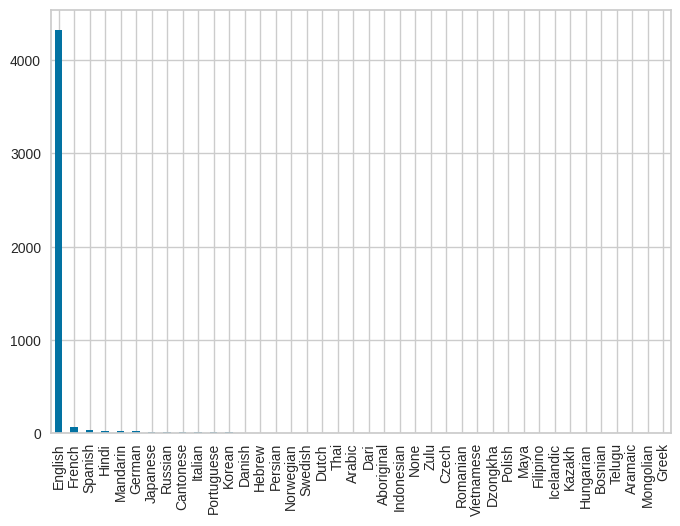

In [62]:
#Count of the language values
movie_df["language"].value_counts().plot(kind='bar')

**94 % of the movie is english**

In [63]:
#Most of the Movies are in English languages. 94% SO, we can drop this column as it dont add information

movie_df.drop('language',axis=1,inplace=True)

<Axes: >

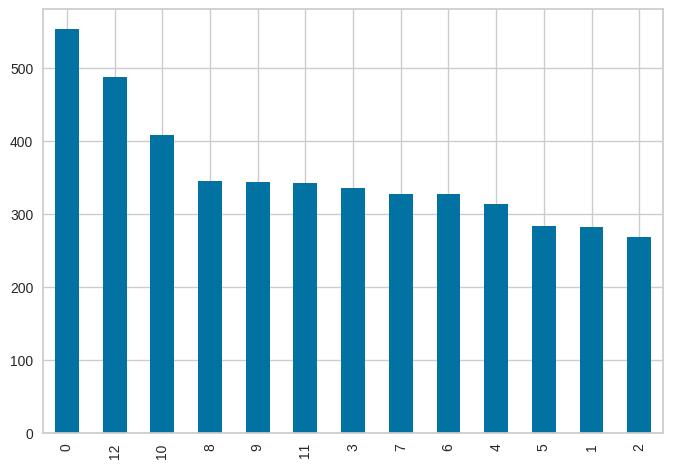

In [64]:
#Decemeber is the Movie month
movie_df["release_month"].value_counts().plot(kind='bar')

In [65]:
#Creating a new columns to check the net profit made by the company (Gross-Budget)

movie_df["Profit"]=movie_df['gross'].sub(movie_df['budget'], axis = 0)
movie_df['Profit_Percentage']=(movie_df["Profit"]/movie_df["gross"])*100 ## Caculating % to normalize Profits
movie_df.head(5)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,WorldWide_gross,release_month,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2783918982,12,523505847.0,68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,963420425,5,9404152.0,3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,879620923,11,-44925825.0,-22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1084439099,7,198130642.0,44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,282778100,3,-190641321.0,-260.942743


In [66]:
#Value counts for the countries

value_counts=movie_df["country"].value_counts()
print(value_counts)

##Keep thershold at 100 to be a dominate country, Rest goes to other cat.
vals = value_counts[:4].index
print (vals)
movie_df['country'] = movie_df.country.where(movie_df.country.isin(vals), 'other')

USA               3506
UK                 411
France             149
Canada             106
Germany             94
Australia           51
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         12
South Korea         12
Russia              11
Denmark             11
Mexico              11
Ireland             11
Brazil               8
South Africa         8
Norway               7
Sweden               5
Netherlands          5
Argentina            4
Iran                 4
Thailand             4
Israel               3
West Germany         3
Switzerland          3
Czech Republic       3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Belgium              2
Hungary              2
Greece               2
Soviet Union         1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
New Line             1
Colombia             1
Bahamas    

**3. Data Visualization**

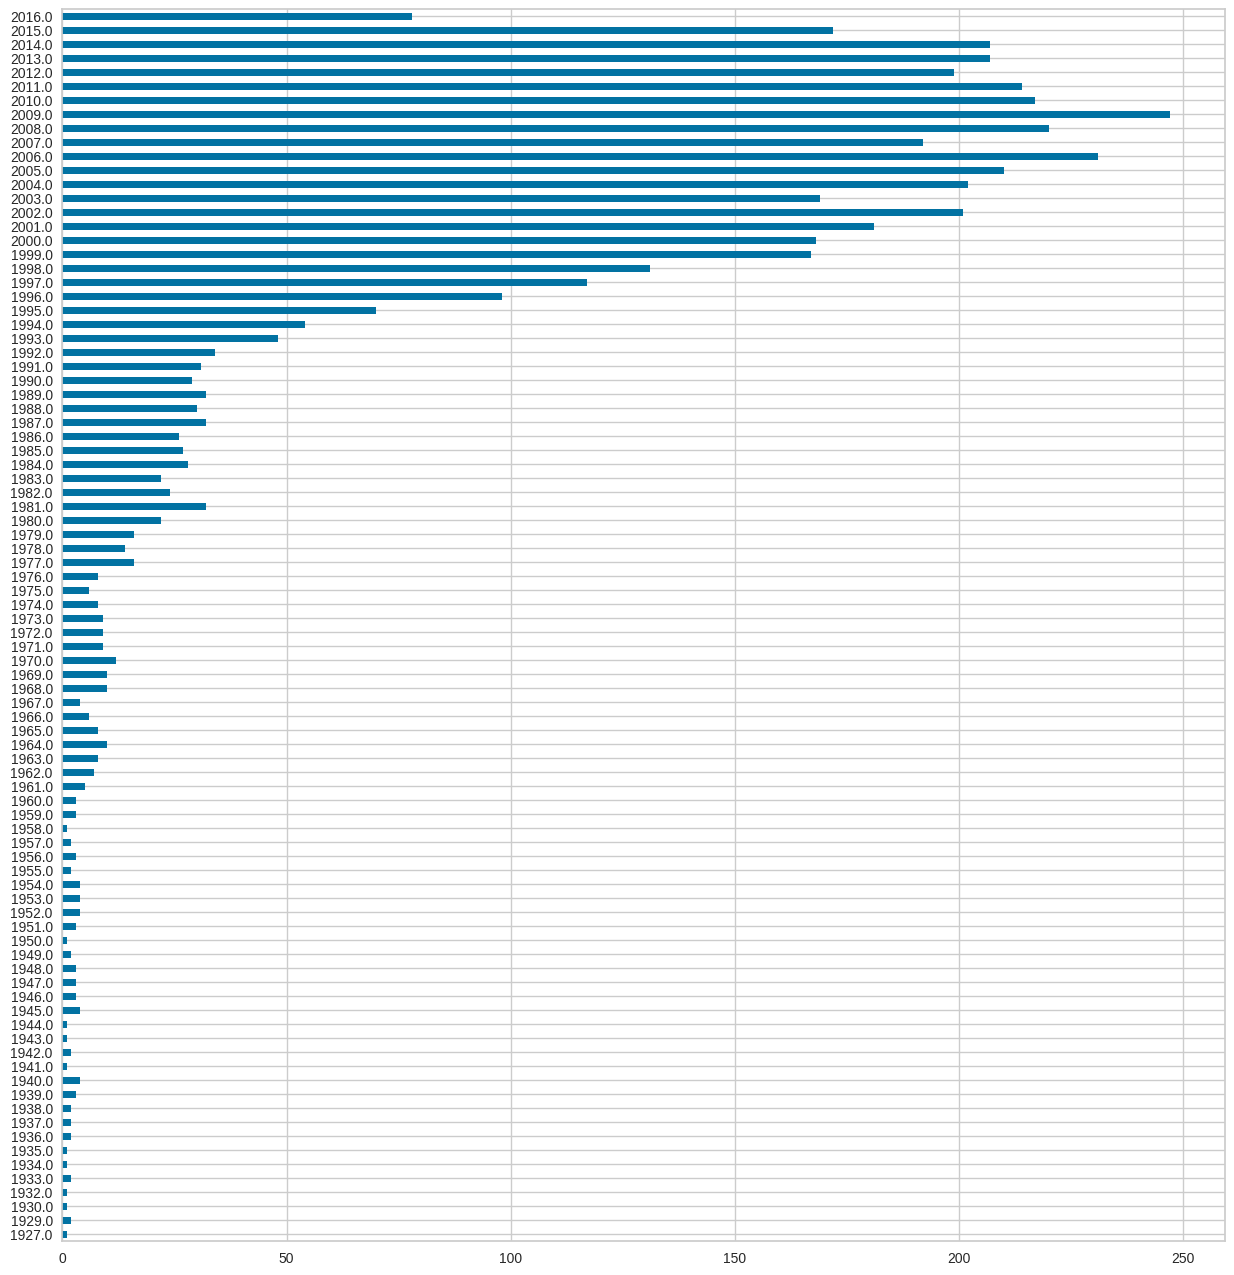

In [67]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
movie_df.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

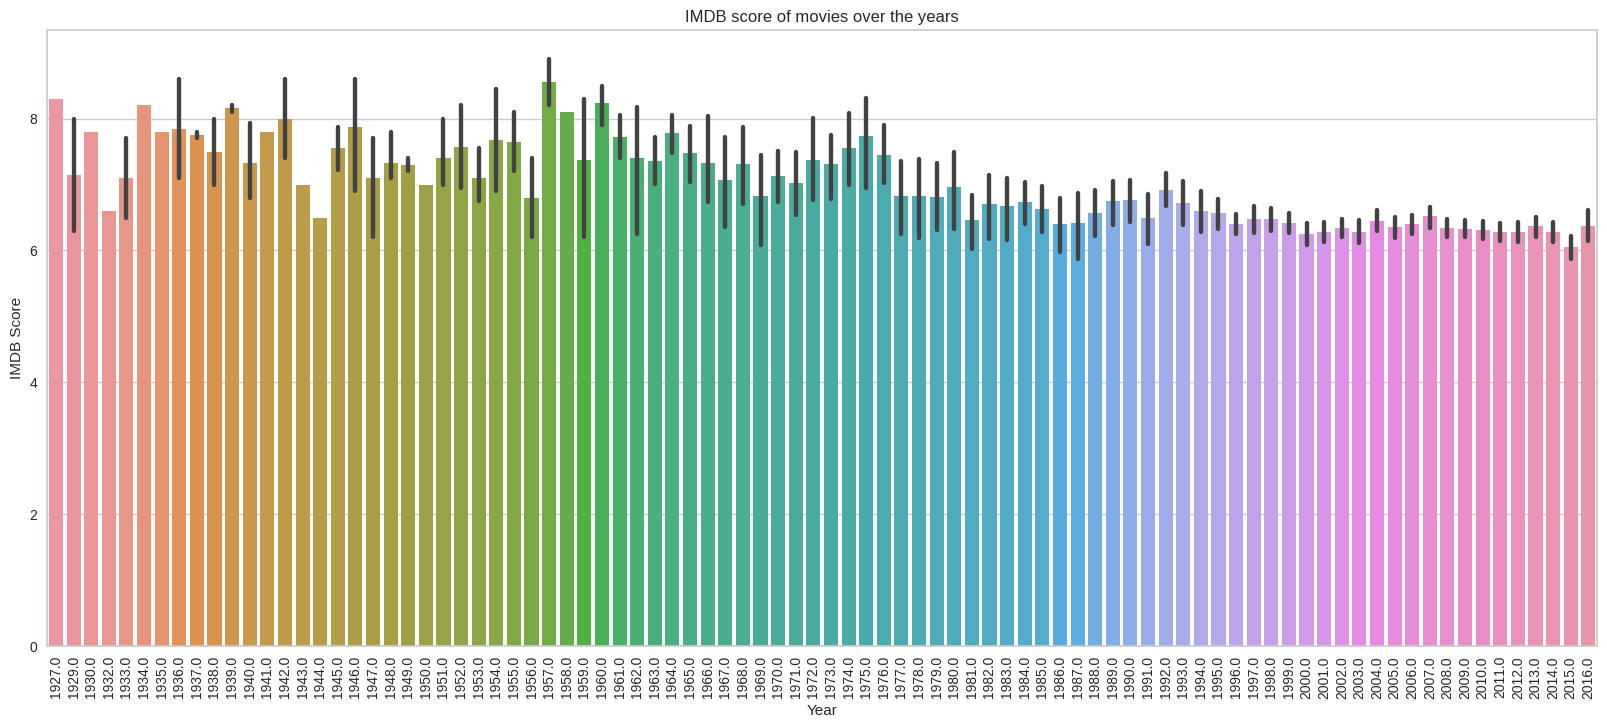

In [68]:
#Plotting the range of IMDB scores of movies for every year

plt.figure(figsize=(20,8))
plt.title('IMDB score of movies over the years')
sns.barplot(x = movie_df.title_year, y=movie_df.imdb_score)
plt.xlabel('Year')
plt.ylabel('IMDB Score')
plt.xticks(rotation=90)
plt.show()

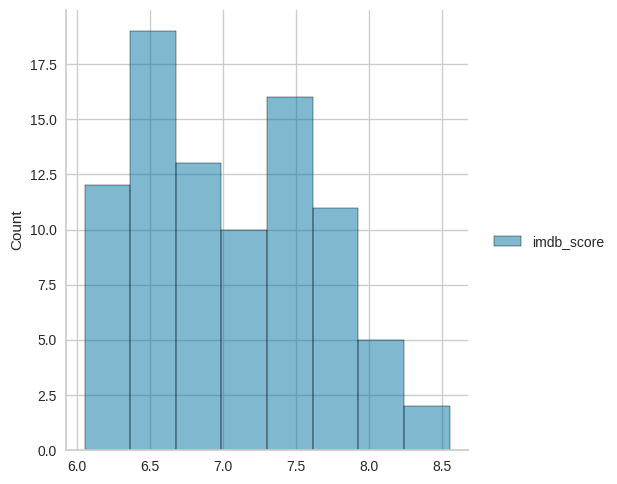

In [69]:
#Calculate population mean from all the movies up to 2016 on imdb_score, Taking the mean of IMDB score or all the movies released in every year
score_yr=movie_df[['title_year','imdb_score']].groupby(['title_year']).mean()
sns.displot(score_yr)

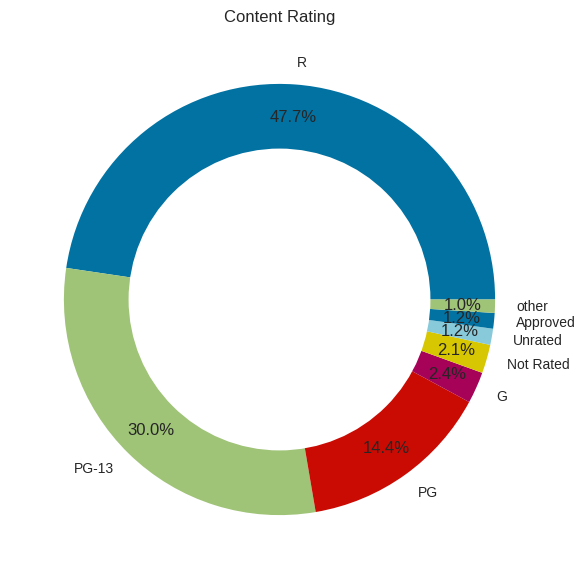

In [70]:
movie_df.loc[movie_df['content_rating'].isin((movie_df['content_rating'].value_counts()[movie_df['content_rating'].value_counts() < 50]).index), 'content_rating'] = 'other'
x = movie_df.content_rating.value_counts().index
y = movie_df.content_rating.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(y, labels=x,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Content Rating')
plt.show()

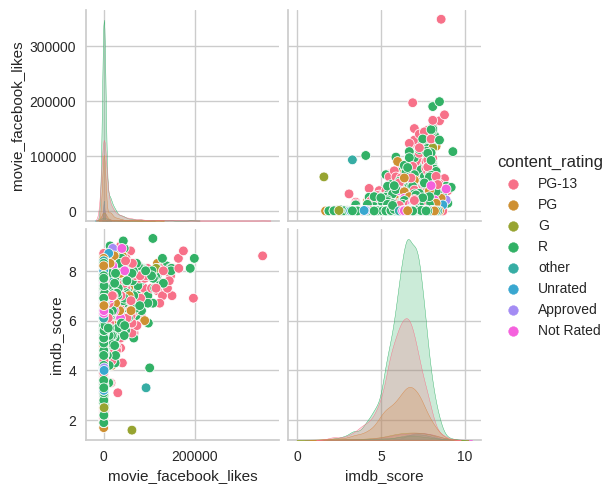

In [71]:
bg = movie_df[['movie_facebook_likes', 'gross', 'imdb_score', 'content_rating']]
bg = bg.dropna()
sns.pairplot(bg[['movie_facebook_likes','imdb_score', 'content_rating']], hue='content_rating')

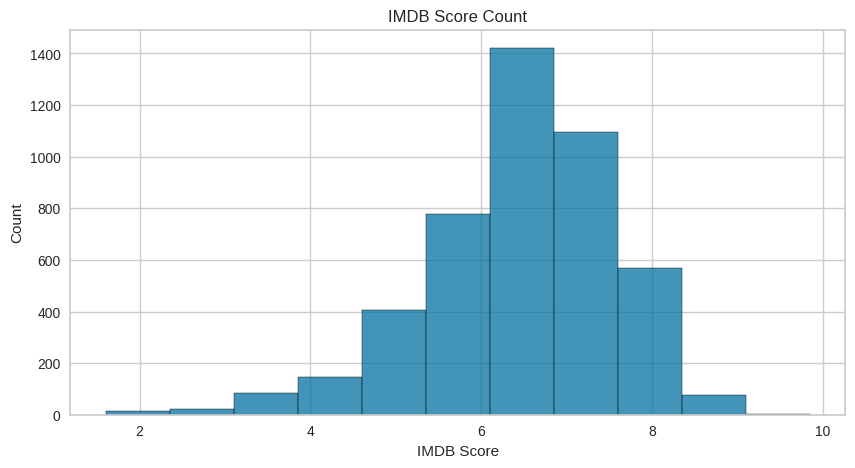

In [72]:
plt.figure(figsize=(10,5))
plt.title('IMDB Score Count')
plt.xlabel('IMDB Score')
sns.histplot(data=movie_df,x='imdb_score',binwidth=0.75)
plt.show()

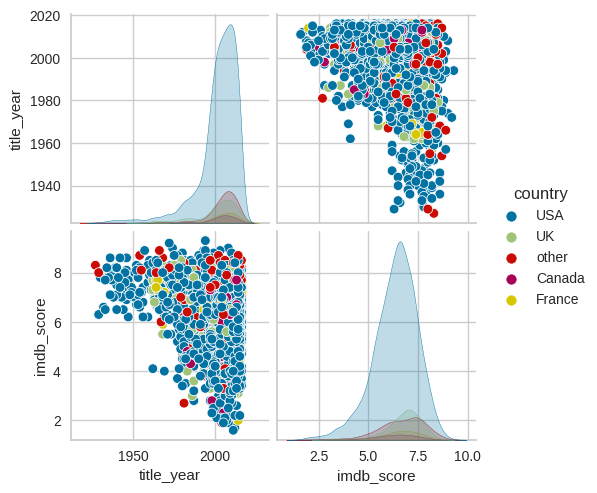

In [73]:
#Now plotting the features year of release and IMDB score with respect to countries in a pairplot to show how the movies fared based on their country of origin

sns.pairplot(movie_df[['title_year','imdb_score', 'country']], hue='country')

#From the above plot we can infer that the significant rise in the number of total movies made that was observed around year 2009 was infact due to the growth of American film industry.
#This can also be observed in IMDB score, the distribution for USA is narrow and also spread over much greater area as compared to all the other countries

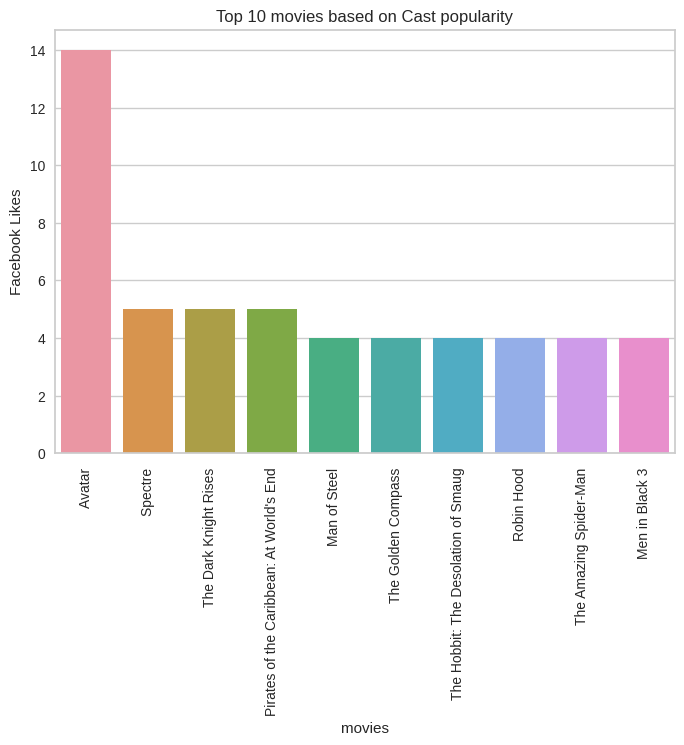

In [74]:
#Now checking the popularity of the cast of movie based on the number of facebook likes the entire cast have

top10 = movie_df['cast_total_facebook_likes'].value_counts().reset_index().sort_values(by='cast_total_facebook_likes', ascending=False).head(10)
temp = []
for i in range(10):
    temp.append(movie_df.movie_title.iloc[[top10.index[i]]].values)
movies = []
for i in range(10):
    movies.append(temp[i][0])
top10 = pd.DataFrame(zip(movies, top10.cast_total_facebook_likes), columns=['movies', 'likes'])

#The above table shows top 10 movies ranked by cast popularity on facebook

plt.title('Top 10 movies based on Cast popularity')
sns.barplot(data=top10, x='movies', y='likes')
plt.xticks(rotation=90)
plt.ylabel('Facebook Likes')
plt.show()

In [75]:
#Genre of Top 20 movies based on their IMDB Scores

G = pd.DataFrame(zip(movie_df.movie_title, movie_df.genres.str.split('|'), movie_df.imdb_score), columns=['movies', 'genre', 'IMDB'])
G.head()
G = G.set_index('IMDB')
G = G.sort_index(ascending=False)
G.head(10)

,movies,genre
IMDB,,
9.3,The Shawshank Redemption,"[Crime, Drama]"
9.2,The Godfather,"[Crime, Drama]"
9.0,The Dark Knight,"[Action, Crime, Drama, Thriller]"
9.0,The Godfather: Part II,"[Crime, Drama]"
8.9,Schindler's List,"[Biography, Drama, History]"
8.9,12 Angry Men,"[Crime, Drama]"
8.9,Pulp Fiction,"[Crime, Drama]"
8.9,"The Good, the Bad and the Ugly",[Western]
8.9,The Lord of the Rings: The Return of the King,"[Action, Adventure, Drama, Fantasy]"


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'James Cameron'),
  Text(1, 0, 'Christopher Nolan'),
  Text(2, 0, 'Peter Jackson'),
  Text(3, 0, 'Steven Spielberg'),
  Text(4, 0, 'Martin Scorsese'),
  Text(5, 0, 'David Fincher'),
  Text(6, 0, 'Quentin Tarantino'),
  Text(7, 0, 'Stanley Kubrick'),
  Text(8, 0, 'Sergio Leone')])

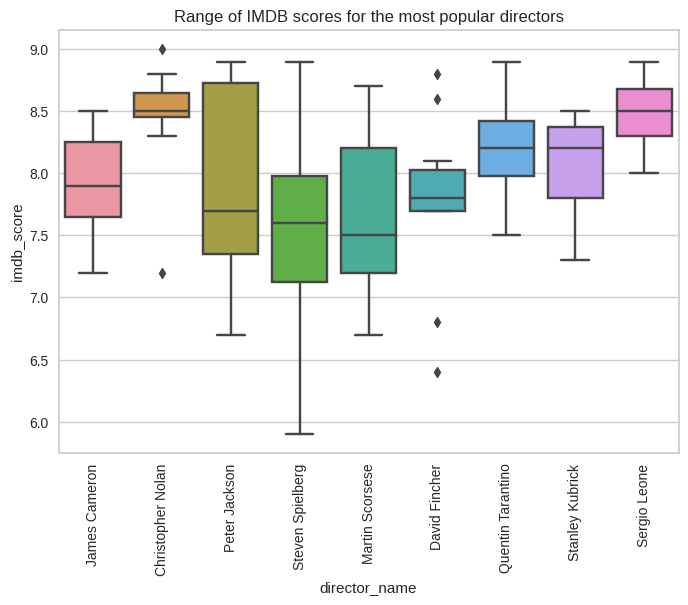

In [76]:

tmp_X = pd.get_dummies(movie_df['director_name'])
tmp_X['imdb_score'] = movie_df['imdb_score']
df_corr = tmp_X.corr()
corr = df_corr['imdb_score']
corr[corr>0.05]
director_name_list = corr[corr>0.05].index.tolist()
movie_df['director_name'] = movie_df['director_name'].astype(object)
plt.title('Range of IMDB scores for the most popular directors')
sns.boxplot(y='imdb_score',x='director_name',data=movie_df[movie_df['director_name'].isin(director_name_list)])
plt.xticks(rotation=90)

**4.1 Removing the Columns with names**

In [77]:
#Removing the not corr director names

movie_df['director_name'] = movie_df['director_name'].where(movie_df['director_name'].isin(director_name_list), 'other')

In [78]:
#Removing the actor1 ,actor 2 and actor 3 names

movie_df.drop('actor_1_name',axis=1,inplace=True)
movie_df.drop('actor_2_name',axis=1,inplace=True)
movie_df.drop('actor_3_name',axis=1,inplace=True)

#Dropping the movie title

movie_df.drop('movie_title',axis=1,inplace=True)

# Remove genre and slpiting it in 3 columns

movie_df['genre_1']=movie_df.genres.str.split('|').str[0].fillna('Other')
movie_df['genre_2']=movie_df.genres.str.split('|').str[1].fillna('Other')
movie_df['genre_3']=movie_df.genres.str.split('|').str[2].fillna('Other')
movie_df.drop('genres',axis=1,inplace=True)

#Dropping the movie title
movie_df.drop('plot_keywords',axis=1,inplace=True)

**4.2 Remove the linear dependant variables**

In [79]:
# Dropiing the profit column from the dataset, as we created them linearly
movie_df.drop('Profit',axis=1,inplace=True)
movie_df.drop('Profit_Percentage',axis=1,inplace=True)

**4.3 Remove the coreelated variables**

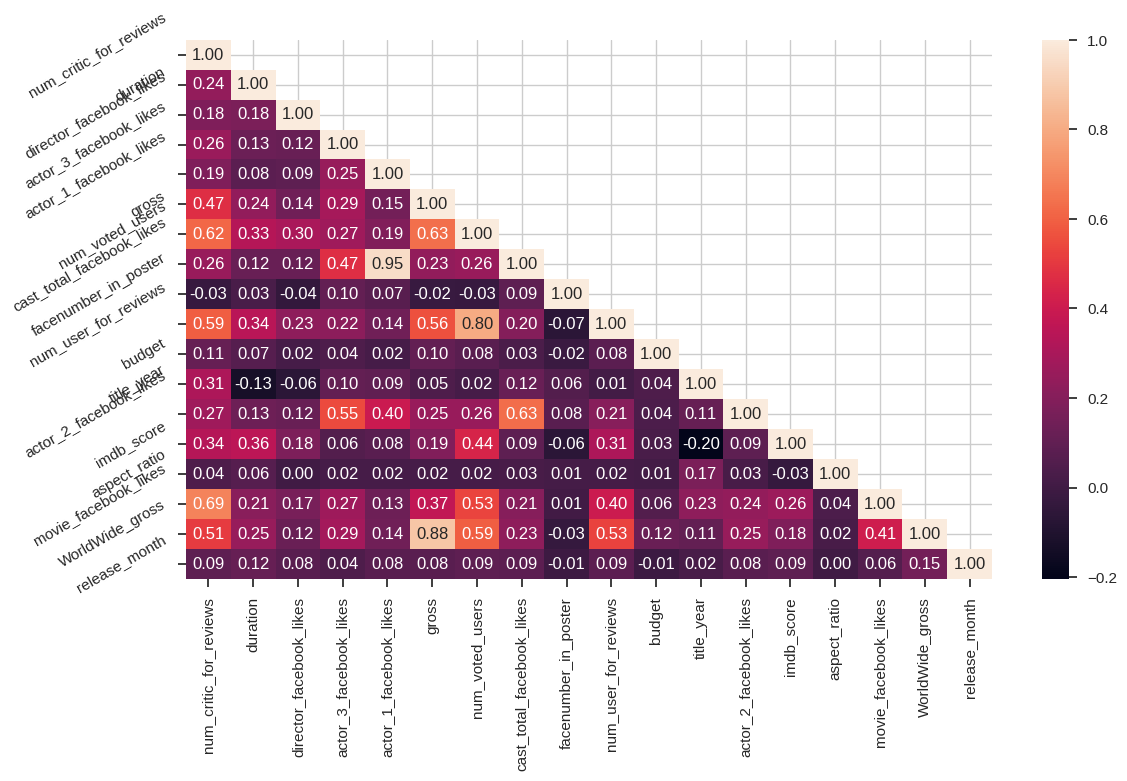

In [80]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = movie_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

 We can see that the cast_total_facebook_likes and actor_1_facebook_like are highly correlated to each other. Both actor2 and actor3 are also somehow correlated to the total. So we want to modify them into two variables: actor_1_facebook_likes and other_actors_facebook_likes.

There are high correlations among num_voted_users, num_user_for_reviews and num_critic_for_reviews. We want to keep num_voted_users and take the ratio of num_user_for_reviews and num_critic_for_reviews.

In [81]:
#Adding the facebook likes of actor 2 and actor 3 together
movie_df['Other_actor_facebbok_likes']=movie_df["actor_2_facebook_likes"] + movie_df['actor_3_facebook_likes']
movie_df.drop('actor_2_facebook_likes',axis=1,inplace=True)
movie_df.drop('actor_3_facebook_likes',axis=1,inplace=True)

movie_df.drop('cast_total_facebook_likes',axis=1,inplace=True)

#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

movie_df['critic_review_ratio']=movie_df['num_critic_for_reviews']/movie_df['num_user_for_reviews']

#Dropping the num_critic_for_review

movie_df.drop('num_critic_for_reviews',axis=1,inplace=True)
movie_df.drop('num_user_for_reviews',axis=1,inplace=True)

**5. Handling the categorical data**

In [82]:
movie_df = pd.get_dummies(data = movie_df, columns = ['country'] , prefix = ['country'] , drop_first = True)
movie_df = pd.get_dummies(data = movie_df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

from sklearn.preprocessing import LabelEncoder
print('All categorical columns',list(movie_df.select_dtypes(include=['object']).columns))
for x in list(movie_df.select_dtypes(include=['object']).columns):
  movie_df[x] = LabelEncoder().fit_transform(movie_df[x])


All categorical columns ['director_name', 'genre_1', 'genre_2', 'genre_3']


**6. Splitting the data into training and test data**

In [83]:
movie_df.columns

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'facenumber_in_poster', 'budget', 'title_year', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'WorldWide_gross',
       'release_month', 'genre_1', 'genre_2', 'genre_3',
       'Other_actor_facebbok_likes', 'critic_review_ratio', 'country_France',
       'country_UK', 'country_USA', 'country_other', 'content_rating_G',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_R', 'content_rating_Unrated', 'content_rating_other'],
      dtype='object')

**7.Feature scaling**

In [84]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test=train_test_split(movie_df.drop('imdb_score',axis=1),movie_df.pop('imdb_score'),test_size=0.3,random_state=100)

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

**8. Classification Model Selection**

Using pycaret for rapid anaylsis of models for implementation.
Note: Feature scaling/normalization done by pycaret

In [85]:
!pip install pycaret[full]
import pycaret
pycaret.__version__

'3.0.4'

In [95]:
# import RegressionExperiment and init the class
from pycaret.regression import *


In [96]:
s= setup(movie_df, target = 'imdb_score', normalize=True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,imdb_score
2,Target type,Regression
3,Original data shape,"(4616, 30)"
4,Transformed data shape,"(4616, 30)"
5,Transformed train set shape,"(3231, 30)"
6,Transformed test set shape,"(1385, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [97]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4863,0.4672,0.6817,0.6057,0.1076,0.0878,0.2910
lightgbm,Light Gradient Boosting Machine,0.4959,0.4771,0.6891,0.5973,0.1085,0.0895,0.3680
gbr,Gradient Boosting Regressor,0.5186,0.5208,0.7198,0.5611,0.1133,0.0942,0.2450
et,Extra Trees Regressor,0.5344,0.5414,0.7341,0.5435,0.1150,0.0964,0.4620
xgboost,Extreme Gradient Boosting,0.5378,0.5508,0.7408,0.5331,0.1154,0.0955,0.1820
rf,Random Forest Regressor,0.5441,0.5548,0.7437,0.5310,0.1162,0.0980,0.2010
br,Bayesian Ridge,0.6629,0.7804,0.8818,0.3412,0.1362,0.1189,0.2710
lr,Linear Regression,0.6632,0.7809,0.8821,0.3407,0.1361,0.1189,0.8780
ridge,Ridge Regression,0.6632,0.7809,0.8821,0.3407,0.1361,0.1189,0.0890
ada,AdaBoost Regressor,0.7312,0.8224,0.9062,0.3006,0.1336,0.1215,0.1320


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


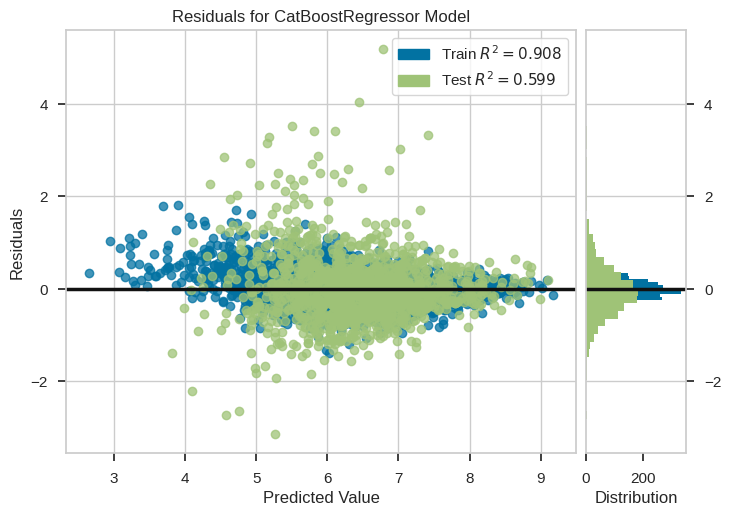

In [98]:
plot_model(best, plot = 'residuals')

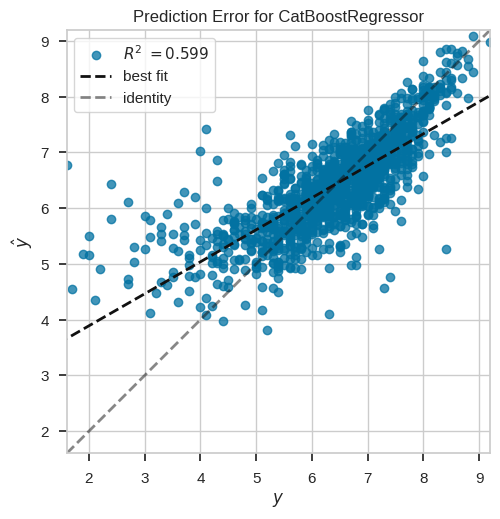

In [99]:
plot_model(best, plot = 'error')

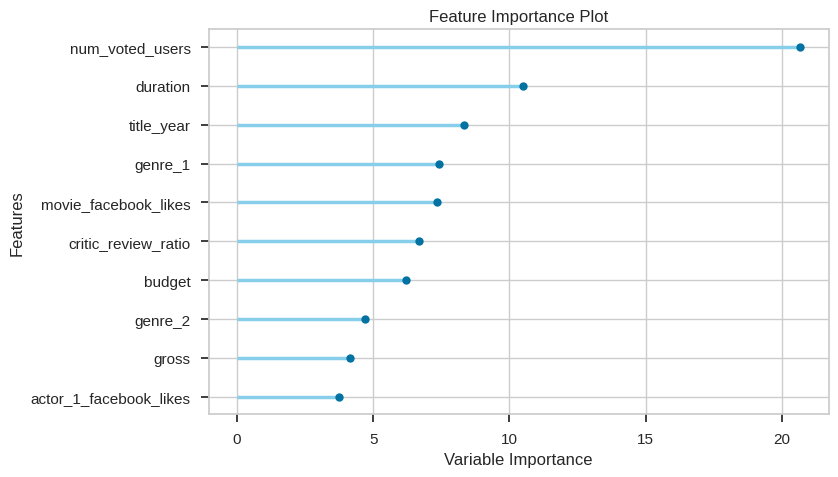

In [100]:
plot_model(best, plot = 'feature')

In [102]:
catboost=create_model('catboost')

# finalize a model
final_cb = finalize_model(catboost)

# deploy a model
#deploy_model(final_lr, model_name = 'lr_aws', platform = 'aws', authentication = { 'bucket'  : 'pycaret-test' })

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4545,0.3918,0.6260,0.6311,0.0933,0.0767
1,0.4760,0.4264,0.6530,0.6352,0.1034,0.0857
2,0.5143,0.5313,0.7289,0.5102,0.1109,0.0902
3,0.4695,0.4409,0.6640,0.6058,0.1015,0.0801
4,0.5353,0.5662,0.7525,0.5528,0.1215,0.1009
5,0.5092,0.5465,0.7392,0.5628,0.1216,0.0961
6,0.5004,0.5207,0.7216,0.6442,0.1189,0.0966
7,0.4543,0.3959,0.6292,0.6640,0.1016,0.0821
8,0.4985,0.4837,0.6955,0.6149,0.1161,0.0959


Processing:   0%|          | 0/4 [00:00<?, ?it/s]